In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
x= df.iloc[:,3:5]

In [6]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
from sklearn.cluster import KMeans


In [9]:
wcss=[]
for i in range(1,15):
    kmean=KMeans(n_clusters=i , init='k-means++', random_state=30)
    kmean.fit(x)
    wcss.append(kmean.inertia_)


C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
wcss


[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30273.394312070042,
 25311.63315295815,
 21850.165282585633,
 19641.456216651568,
 17887.084456628647,
 15990.444512350397,
 14666.175194043304,
 12797.180630643867]

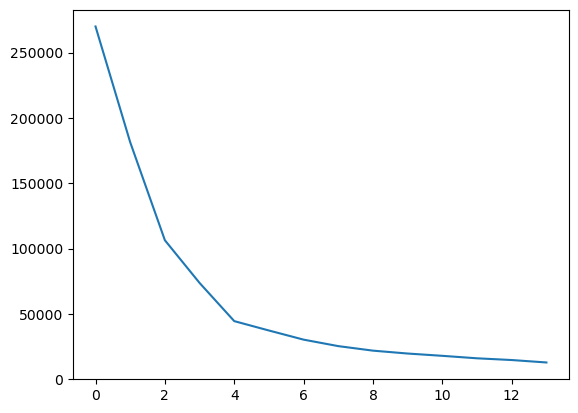

In [13]:
plt.figure()
plt.plot(wcss)

# from above figure we can found that after k=5 there is no major changein grpah so optimal number of clusters we can take is 5

In [17]:
kmean_new= KMeans(n_clusters=5 , init='k-means++', random_state=30)

In [20]:
kmean_new.fit_predict(x)  ##predict the cluster umber for each row 

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [72]:
x['Cluster number']= kmean_new.fit_predict(x)
X=pd.DataFrame(x['Cluster number'])

In [46]:
x

,Annual Income (k$),Spending Score (1-100),Cluster number
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,2
197,126,74,3
198,137,18,2


In [73]:
X

,Cluster number
0,3
1,0
2,3
3,0
4,3
...,...
195,2
196,4
197,2
198,4


In [23]:
x[x['Cluster number']==0]

,Annual Income (k$),Spending Score (1-100),Cluster number
1,15,81,0
3,16,77,0
5,17,76,0
7,18,94,0
9,19,72,0
11,19,99,0
13,20,77,0
15,20,79,0
17,21,66,0
19,23,98,0


In [27]:
kmean_new.predict([[55,31]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

In [28]:
from sklearn.cluster import MiniBatchKMeans

In [31]:
mini_batch =MiniBatchKMeans(n_clusters=5 )

In [32]:
mini_batch.fit(x)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=5)

In [34]:
mini_batch.predict([[55,31,2]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(


array([1])

In [47]:
from sklearn.cluster import DBSCAN
x.drop(columns='Cluster number', inplace=True)

In [63]:
dbscan= DBSCAN(eps=1, min_samples=3)

In [64]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [65]:
dbscan.fit(x)

DBSCAN(eps=1, min_samples=3)

In [66]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1,
        0, -1, -1, -1, -1, -1,  1,  2,  2,  1,  2, -1,  2,  2, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1,  3, -1,  4, -1, -1,  3,  4,  3,  4, -1,
       -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1,  5, -1,
       -1, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [68]:
set(dbscan.labels_)  ##-1 means it is not able to accomodate that x value into any cluster

{-1, 0, 1, 2, 3, 4, 5}

In [83]:
x['Cluster number']=dbscan.labels_

In [84]:
x

,Annual Income (k$),Spending Score (1-100),Cluster number
0,15,39,-1
1,15,81,-1
2,16,6,-1
3,16,77,-1
4,17,40,-1
...,...,...,...
195,120,79,-1
196,126,28,-1
197,126,74,-1
198,137,18,-1


In [71]:
from sklearn import metrics

# just for testing we are taking actual label as kmeand result of cluster

In [75]:
actual_label = X['Cluster number']
pred_label= dbscan.labels_

In [79]:
X['Cluster number']

0      3
1      0
2      3
3      0
4      3
      ..
195    2
196    4
197    2
198    4
199    2
Name: Cluster number, Length: 200, dtype: int32

In [85]:
metrics.adjusted_rand_score(actual_label, dbscan.labels_)  ##check

-0.05702733098672127

In [86]:
metrics.jaccard_score(actual_label,dbscan.labels_, average='macro')

0.005291005291005291

# XGBOOST AND OPTUNA 

In [1]:
pip install optuna

     ------------------------------------- 365.3/365.3 kB 36.5 kB/s eta 0:00:00
     ------------------------------------- 210.5/210.5 kB 17.0 kB/s eta 0:00:00
     --------------------------------------- 78.7/78.7 kB 21.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install xgboost